In [1]:
# python
# %pip install jupyter
# %pip install matplotlib
# %pip install -U scikit-learn
# %pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, MinMaxScaler

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/LuisSante/Datasets/main/test.csv')
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
dataset = dataset[dataset['ScreenPorch'] != 0]
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
26,1487,60,RL,60.0,17433,Pave,NaN,IR2,Lvl,AllPub,...,256,0,NaN,NaN,NaN,0,1,2010,WD,Normal
29,1490,20,FV,84.0,10440,Pave,NaN,Reg,Lvl,AllPub,...,216,0,NaN,NaN,NaN,0,5,2010,WD,Normal
51,1512,20,RL,88.0,9680,Pave,NaN,Reg,Lvl,AllPub,...,204,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,2884,70,RL,70.0,12320,Pave,NaN,IR1,HLS,AllPub,...,104,0,NaN,GdWo,NaN,0,5,2006,WD,Normal
1425,2886,60,RL,78.0,15600,Pave,NaN,Reg,Lvl,AllPub,...,192,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1434,2895,120,RM,41.0,5748,Pave,NaN,IR1,HLS,AllPub,...,153,0,NaN,NaN,NaN,0,2,2006,New,Partial
1435,2896,120,RM,44.0,3842,Pave,NaN,IR1,HLS,AllPub,...,155,0,NaN,NaN,NaN,0,12,2006,WD,Normal


In [6]:
dataset = dataset[dataset['MSZoning'] == 'RL']
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
26,1487,60,RL,60.0,17433,Pave,NaN,IR2,Lvl,AllPub,...,256,0,NaN,NaN,NaN,0,1,2010,WD,Normal
51,1512,20,RL,88.0,9680,Pave,NaN,Reg,Lvl,AllPub,...,204,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal
61,1522,20,RL,80.0,10032,Pave,NaN,Reg,Lvl,AllPub,...,160,0,NaN,GdWo,NaN,0,6,2010,WD,Normal
69,1530,20,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,...,240,0,NaN,NaN,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,2861,20,RL,73.0,16133,Pave,NaN,Reg,HLS,AllPub,...,112,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml
1421,2882,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,...,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1423,2884,70,RL,70.0,12320,Pave,NaN,IR1,HLS,AllPub,...,104,0,NaN,GdWo,NaN,0,5,2006,WD,Normal
1425,2886,60,RL,78.0,15600,Pave,NaN,Reg,Lvl,AllPub,...,192,0,NaN,NaN,NaN,0,7,2006,WD,Normal


In [7]:
dataset.size

9360

In [8]:
dataset = dataset[dataset['LotFrontage'].notna()]

In [9]:
colum = {
    'X' : dataset['MSSubClass'],
    'y' : dataset['LotFrontage']
}

In [10]:
dataset2 = pd.DataFrame(colum)
dataset2

,X,y
4,120,43.0
26,60,60.0
51,20,88.0
61,20,80.0
69,20,80.0
...,...,...
1367,60,88.0
1400,20,73.0
1421,50,80.0
1423,70,70.0


<function matplotlib.pyplot.show(close=None, block=None)>

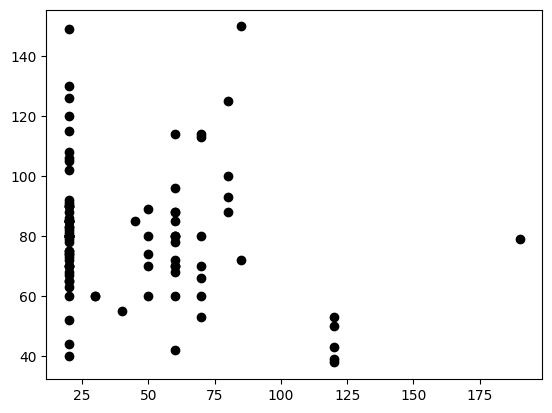

In [11]:
plt.scatter(dataset2['X'] , dataset2['y'] , c = 'k')
plt.show

In [12]:
scaler = Normalizer()
scaled_df = scaler.fit_transform(dataset2)
scaled_df = pd.DataFrame(scaled_df, columns=['x' , 'y'])
scaled_df

,x,y
0,0.941386,0.337330
1,0.707107,0.707107
2,0.221621,0.975133
3,0.242536,0.970143
4,0.242536,0.970143
...,...,...
91,0.563337,0.826227
92,0.264235,0.964458
93,0.529999,0.847998
94,0.707107,0.707107


In [13]:
scaler2 = MinMaxScaler()
scaled_df2 = scaler2.fit_transform(dataset2)
scaled_df2 = pd.DataFrame(scaled_df2, columns=['x' , 'y'])
scaled_df2

,x,y
0,0.588235,0.044643
1,0.235294,0.196429
2,0.000000,0.446429
3,0.000000,0.375000
4,0.000000,0.375000
...,...,...
91,0.235294,0.446429
92,0.000000,0.312500
93,0.176471,0.375000
94,0.294118,0.285714


<function matplotlib.pyplot.show(close=None, block=None)>

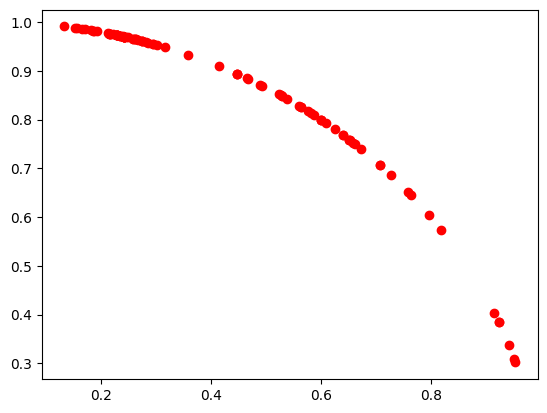

In [14]:
plt.scatter(scaled_df['x'] , scaled_df['y'] , c = 'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

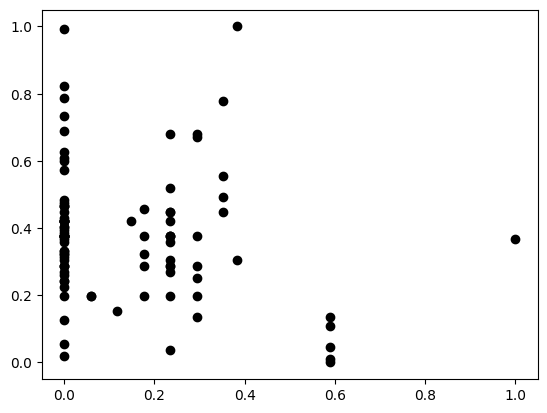

In [15]:
plt.scatter(scaled_df2['x'] , scaled_df2['y'] , c = 'k')
plt.show